In [207]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

$$ x = a y^2 + by + c $$

$$ v = \sqrt{\frac{2(e^2-1)G^2 M^2 S^2}{2L^2} + \frac{2GM}{r}}$$

In [208]:
"""Constants to be used in subsequent code. """
o_gamma = 6.67384 * (10**-11) #m3 kg-1 s-2;    tu=10^8 years
gamma = o_gamma* (3.24077929e-20/1)**3 * (1/3.1689e-8)**2 * (1.989e30/1) * (10**8/1)**2 #kpc3 m_sun-1 tu-2
gamma
#         Vold = np.sqrt((2.0 * gamma * M/r_s[i]) + ((2*(e**2 - 1)*gamma**2 * M**2 * S**2)/(2*L**2)))

4.499268066804861e-08

In [247]:
def initial_galaxy(M, S, e, N=50):
    icg = [] 
    if e == 1:
        Y = np.linspace(-10, 10, N)
        for j in range(len(Y)):
            X = []
            X.append(-Y[j]**2/100 - 25)
        for i in range(len(X)):
            r_s = np.sqrt(np.array(X)**2 + np.array(Y)**2)
            phi = np.arctan(4.0*25/(-2.0*np.array(Y)))
#             theta = np.arctan(np.array(Y)/np.array(X))
#             a = np.array(r_s) * (1 + e*np.cos(np.array(theta))) / (1 - e**2)

            V = np.sqrt((2*gamma*(M+S))/np.array(r_s))
#             V = np.sqrt((2.0 * gamma * M/np.array(r_s)) + (((e**2 - 1)*gamma * M)/(np.array(r_s)*(1 + e*np.cos(np.array(theta))))))
            Vx = np.array(V)*np.cos(np.array(phi))
            Vy = np.array(V)*np.sin(np.array(phi))
            IC = np.array([X[i], Y[i], Vx[i], Vy[i]])
            icg.append(IC)
    elif e > 1:
#         thetan = np.linspace(0, 2*np.pi, N)
        Y = np.linspace(-10, 10, N)
        for i in range(len(Y)):
            a = (e-1)/(25*e)-25
            c = (e-1)/(25*e)
            b = a*np.sqrt(1-e**2)
            h = -25 - a
#             r = (a * (e**2-1)/(1+ e*np.cos(np.array(thetan))))
#             x = np.array(r) * np.cos(np.array(thetan))
#             y = np.array(r) * np.sin(np.array(thetan))
            X = np.sqrt(a**2 * ((np.array(Y)**2 / b**2) + 1)) + h
            r = np.sqrt(np.array(X)**2 + np.array(Y)**2)
            v = np.sqrt((2*gamma*M)/np.array(r) - (gamma*M)/a)
            
            Ic = np.array([X[i], Y[i]])
            icg.append(Ic)
    else:
        return 'Not available'
    return icg

In [248]:
M, S, e = 1e11, 1e11, 3
ic_gala = initial_galaxy(M, S, e)
# ic_gala

/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:26: RuntimeWarning: invalid value encountered in sqrt


In [249]:
x = [p[0] for p in ic_gala]
y = [p[1] for p in ic_gala]
# x

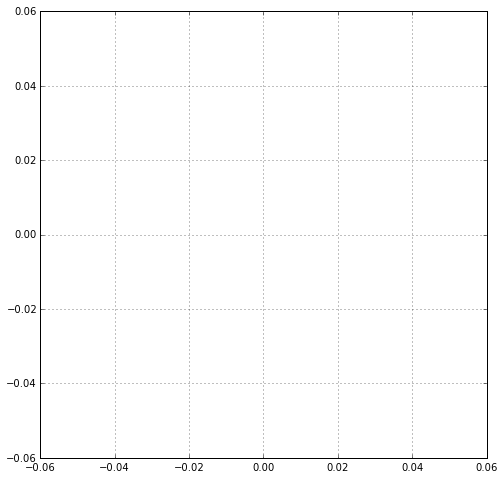

In [250]:
plt.figure(figsize=(8,8))
plt.plot(x, y)
# plt.plot(vx, vy, color='red')
# plt.ylim(-100, 100)
# plt.xlim(-35, 25)
plt.grid()

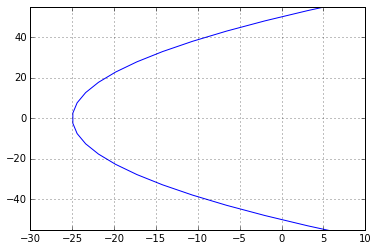

In [122]:
t = np.linspace(-5, 5, 100)
x = 25*t**2 - 25
y = 50*t
plt.plot(x, y)
plt.xlim(-30, 10)
plt.ylim(-55, 55)
plt.grid();